# Import the datasets and libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
thera_cust = pd.read_csv("https://github.com/bcool4ever/project1/Bank_Personal_Loan_Modelling.csv")

In [3]:
thera_cust.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Check datatype, statistical summary
shape, null values or incorrect imputation

In [4]:
thera_cust.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
thera_cust.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
thera_cust.isnull().values.any()
#thera_cust.isnull().sum()

False

In [7]:
thera_cust.shape

(5000, 14)

In [8]:
#Number of unique in each column?
#Number of people with zero mortgage?
#Number of people with zero credit card spending per month?
#Value counts of all categorical columns.
#Univariate and Bivariate
#Get data model ready

In [9]:
thera_cust.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [10]:
thera_cust['Education'].unique()

array([1, 2, 3])

In [11]:
zero_mortgage = thera_cust[thera_cust.Mortgage <= 0].count()
print(zero_mortgage['Mortgage'])

3462


In [12]:
zero_cc = thera_cust[thera_cust.CCAvg <= 0].count()
print(zero_cc['CreditCard'])

106


In [13]:
temp_thera_cust = thera_cust.copy()

In [14]:
#Value count of some categorical columns
temp_thera_cust['Family'] = temp_thera_cust['Family'].astype('category')
temp_thera_cust['Education'] = temp_thera_cust['Education'].astype('category')
for i in list(temp_thera_cust.columns[temp_thera_cust.dtypes=='category']):
    print(temp_thera_cust[i].value_counts())
    print()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dtype: int64



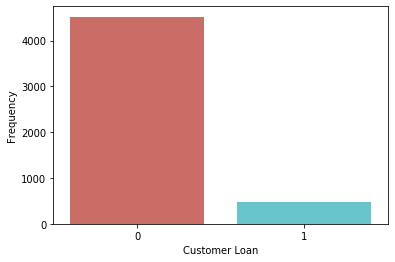

In [15]:
#Checking the Age distribution of the dataset (Univariate)
sns.countplot(x='Personal Loan',data=thera_cust,palette='hls')
plt.xlabel("Customer Loan")
plt.ylabel("Frequency")
plt.show()

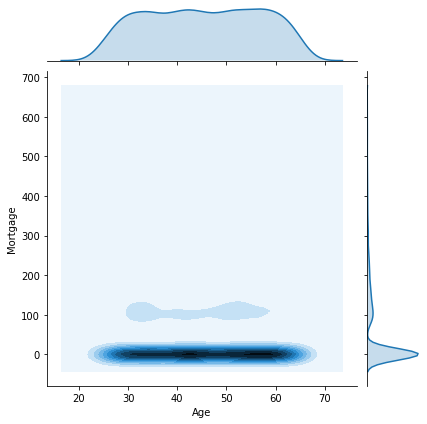

In [16]:
#Checking Bivariate relationship between Age and Mortgage amount
sns.jointplot(x='Age',y='Mortgage',data=thera_cust,kind='kde');

In [17]:
thera_cust.groupby('Personal Loan').mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


Observations:
#Income is a determining factor in loan approval
#Credit card average spending monthly is significantly higher for those with personal loan
#Average education level of approved personal loan customers is higher than those without a loan
#Customers with more mortgage loan significantly have more personal loans than those with lesser mortgage loans
    

In [18]:
#Study how number of family members and education level affects customers ability to take Personal Loan
thera_cust.groupby(['Family','Education'])['Personal Loan'].value_counts()

Family  Education  Personal Loan
1       1          0                669
                   1                  9
        2          0                286
                   1                 40
        3          0                410
                   1                 58
2       1          0                653
                   1                  4
        2          0                215
                   1                 50
        3          0                322
                   1                 52
3       1          0                309
                   1                 40
        2          0                339
                   1                 44
        3          0                229
                   1                 49
4       1          0                372
                   1                 40
        2          0                381
                   1                 48
        3          0                335
                   1                 46
Name: P

In [19]:
thera_cust.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [20]:
negexp = thera_cust[thera_cust['Experience'] < 0]

In [21]:
negexp.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0


In [22]:
#Replaces all negative Experience values with zero
for i in list(negexp[negexp['Experience']<0].index):
    thera_cust.at[i,'Experience'] = thera_cust.at[i,'Experience'] * -1


In [23]:
thera_cust[thera_cust['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [25]:
#Get Data Model Ready
#Dropping customer ID
thera_cust.drop(['ID'],axis=1,inplace=True)
thera_cust.drop(['ZIP Code','Securities Account','CD Account','Online','CreditCard'],axis=1,inplace=True)
thera_cust.drop(['Family','Age','Experience','Family'],axis=1,inplace=True)
thera_cust.head()

,Income,CCAvg,Education,Mortgage,Personal Loan
0,49,1.6,1,0,0
1,34,1.5,1,0,0
2,11,1.0,1,0,0
3,100,2.7,2,0,0
4,45,1.0,2,0,0


In [26]:
#Getting Data Model Ready
#Fitting data on the X and Y Axis

X = thera_cust.drop('Personal Loan',axis=1)
Y = thera_cust[['Personal Loan']]

In [27]:
Y['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [28]:
#Data set already converted
#X = pd.get_dummies(X,drop_first=True)


In [67]:
#Split into train and test set at 70:30 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.35,random_state=1)

In [68]:
#Use Logistic Regression model to predict the number of a customers buying personal loans. 
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
#logreg.fit(X_train,y_train)
logreg.fit(X_train,np.ravel(y_train))
#Print all the metrics related for evaluating the model performance


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_predict = logreg.predict(X_test)

In [70]:
def drawcm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    print(cm)
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
    plt.xlabel('Predicted')
    plt.ylabel('Observed')
    plt.show

Training accuracy 0.940923076923077

Testing accuracy 0.9434285714285714

Confusion matrix 
[[1559   19]
 [  80   92]]
None

Recall:  0.5348837209302325

F1 Score:  0.6501766784452295

Precision:  0.8288288288288288

Roc Auc Score:  0.7614215816311493


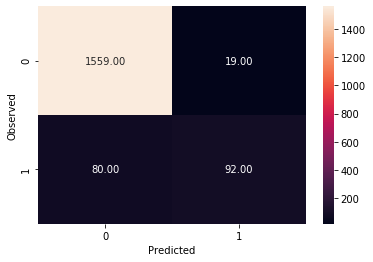

In [71]:
print("Training accuracy",logreg.score(X_train,y_train))
print()
print("Testing accuracy",logreg.score(X_test,y_test))
print()
print("Confusion matrix ")
print(drawcm(y_test,y_predict))
print()
print("Recall: ",recall_score(y_test,y_predict))
print()
print("F1 Score: ",f1_score(y_test,y_predict))
print()
print("Precision: ",precision_score(y_test,y_predict))
print()
print("Roc Auc Score: ", roc_auc_score(y_test,y_predict))

True Positive (Personal Loan Customer that was correctly predicted as eligibile) = 92
True Negative (non Personal Loan Customers that were predicted as ineligible) = 1559
False Positive (Ineligible Personal Loan Customers that were predicted as eligible) = 19
False Negative (Personal Loan Customers that were predicted as ineligibile) = 80
Accuracy of the model is 94%
Precision of the model is over 82%
Recall value of 0.53 showing the model correctly identifies 53% of prospective personal loan customers. 

In [72]:
from sklearn.metrics import roc_auc_score,roc_curve


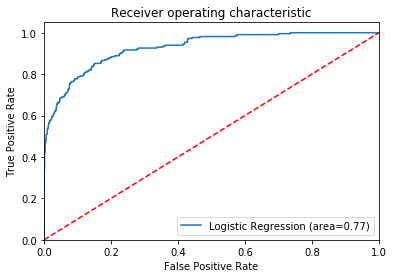

In [61]:
logitroc_auc = roc_auc_score(y_test,logreg.predict(X_test))
fpr,tpr,thresholds = roc_curve (y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area=%0.2f)'% logitroc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver operating characteristic")
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

In [403]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [78]:
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2',C=0.75,solver=i)
    model.fit(X_train,np.ravel(y_train))
    y_predict = model.predict(X_test)
    train_score.append(round(model.score(X_train,y_train),3))
    test_score.append(round(model.score(X_test,y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.941, 0.941, 0.936, 0.905, 0.905]

[0.943, 0.943, 0.939, 0.902, 0.902]


/Users/adewa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/adewa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The best solver is the default (lbfgs) with a more balanced train and test values